In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,8)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

<br><br><h1 style='font-family:Trebuchet MS; color:#34495E'> 311 Complaints Analysis (HPD) </h1><center>

<table style='font-family:Trebuchet MS'>
<col width = '550'>
<col width = '450'>
<tr>
<td><img src="https://www1.nyc.gov/assets/hpd/images/content/pages/what-to-expect-sm.png" /></td>
<td>
The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The <b>Department of Housing Preservation and Development</b> of New York City is the agency that processes 311 complaints that are related to housing and buildings.<br>
<br>    
In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

</td>
</tr>
</table>

<h1 style='font-family:Trebuchet MS; color:#34495E'> Problem Statement <a id='1'></a></h1>
<p style='font-family:Trebuchet MS'>The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their questions:<ol><p style='font-family:Trebuchet MS'>
1. Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?<br><br>
2. Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?<br><br>
    <p style='font-family:Trebuchet MS; color:orange'>
3. Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?<br><br>
4. Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?


<h1 style='font-family:Trebuchet MS; color:#34495E'> Table of Contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px; font-family:Trebuchet MS; color:#34495E">

1.  [Problem Statement](#1)<br>
2.  [About Dataset 1](#2)<br>
3.  [About Dataset 2](#3)<br>
4.  [Data Preparation](#4)<br>
5.  [Feature Selection](#5)<br>
6.  [Logistic Regression](#6)<br>
7.  [K Numbers Neighbors](#7)<br>
8.  [SVM (Support Vector Machines)](#8)<br>
9.  [Decision Tree](#9)<br>
10.  [Conclusion](#10)<br>

</div>

<h1 style='font-family:Trebuchet MS; color:#34495E'> About Dataset 1<a id='2'></a></h1>
<p style='font-family:Trebuchet MS'>This dataset will have complaints submitted between 2010 and 2020. It can be downloaded from <a href = 'https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status'> here </a>.
<table style='font-family:Trebuchet MS'>
  <tr>
    <th>Field</th>
    <th>Description</th>
  </tr>
  <tr>
      <td><code>created_date</code></td>
    <td>Date SR was created. </td>
  </tr>
  <tr>
    <td><code>unique_key</code></td>
    <td>Unique identifier of a Service Request (SR) in the open data set. </td>
  </tr>  
  <tr>
    <td><code>complaint_type</code></td>
    <td>This is the first level of a hierarchy identifying the topic of the incident or condition. Complaint Type may have a corresponding Descriptor (below) or may stand alone.</td>
  </tr>  
  <tr>
    <td><code>incident_zip</code></td>
    <td>Incident location zip code, provided by geo validation.</td>
  </tr> 
    <tr>
    <td><code>incident_address</code></td>
    <td>House number of incident address provided by submitter.</td>
  </tr> 
    <tr>
    <td><code>street_name</code></td>
    <td>Street name of incident address provided by the submitter.</td>
  </tr>  
    <tr>
    <td><code>address_type</code></td>
    <td>Type of incident location information available.</td>
  </tr> 
    <tr>
    <td><code>city</code></td>
    <td>City of the incident location provided by geovalidation. </td>
  </tr>
    <tr>
    <td><code>resolution_description</code></td>
    <td>Describes the last action taken on the SR by the responding agency. May describe next or future steps. </td>
  </tr>    
    <tr>
    <td><code>borough</code></td>
    <td>Provided by the submitter and confirmed by geovalidation.</td>
  </tr>    
    <tr>
    <td><code>latitude</code></td>
    <td>Geo based Lat of the incident location.</td>
  </tr>   
    <tr>
    <td><code>longitude</code></td>
    <td>Geo based Long of the incident location.</td>
  </tr>       
    <tr>
    <td><code>closed_date</code></td>
    <td>Date SR was closed by responding agency. </td>
  </tr>           
    <tr>
    <td><code>location_type</code></td>
    <td>Describes the type of location used in the address information. </td>
  </tr> 
    <tr>
    <td><code>status</code></td>
    <td>Status of SR submitted. </td>
  </tr> 
    
    
    
    
</table>

<h1 style='font-family:Trebuchet MS; color:#34495E'> About Dataset 2<a id='3'></a></h1><p style='font-family:Trebuchet MS'>
This PLUTO dataset will have the housing characteristic in BRONX. It can be downloaded from <a href = ' https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip'> here </a>.

<table style='font-family:Trebuchet MS'>
  <tr>
    <th>Field</th>
    <th>Description</th>
  </tr>
  <tr>
      <td><code>Address</code></td>
    <td>The building's address. </td>
  </tr>
  <tr>
    <td><code>BldgDepth</code></td>
    <td>The building’s depth, which is the effective perpendicular distance, measured in feet.</td>
  </tr>  
  <tr>
    <td><code>BuiltFAR</code></td>
    <td>The BUILT FLOOR AREA RATIO is the total building floor area divided by the area of the tax lot.</td>
  </tr>  
  <tr>
    <td><code>LotArea</code></td>
    <td>Total area of the tax lot, expressed in square feet rounded to the nearest integer.</td>
  </tr> 
    <tr>
    <td><code>LotDepth</code></td>
    <td>The tax lot's depth measured in feet.</td>
  </tr> 
    <tr>
    <td><code>NumFloors</code></td>
    <td>The number of full and partial stories starting from the ground floor, for the tallest building on the tax lot.</td>
  </tr>  
    <tr>
    <td><code>ResArea</code></td>
    <td>An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use. </td>
  </tr> 
    <tr>
    <td><code>YearBuilt</code></td>
    <td>The year construction of the building was completed. </td>
  </tr>
    <tr>
    <td><code>YearAlter1</code></td>
    <td>If a building has only been altered once, YEAR ALTERED 1 is the date that alteration began. </td>
  </tr>    
    <tr>
    <td><code>ZipCode</code></td>
    <td>The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot. The XY coordinates are expressed in the New YorkLong Island State Plane coordinate system.</td>
  </tr>    
    <tr>
    <td><code>YCoord</code></td>
    <td>The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot. The XY coordinates are expressed in the New YorkLong Island State Plane coordinate system.</td>
  </tr>   
    <tr>
    <td><code>XCoord</code></td>
    <td>The X coordinate of the XY coordinate pair which depicts the approximate location of the lot. The XY coordinates are expressed in the New YorkLong Island State Plane coordinate system. </td>
  </tr>       
    
    
    
    
    
</table>

<h1 style='font-family:Trebuchet MS; color:#34495E'> Data Preparation <a id='4'></a></h1>

In [2]:
dataset_1 = pd.read_csv('fhrw-4uyv (3).csv')
dataset_2 = pd.read_csv('BX_18v1.csv')
dataset_2 = dataset_2[['Address', 'BldgDepth', 'BuiltFAR','LotArea', 'LotDepth', 'NumFloors', 'ResArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<p style='font-family:Trebuchet MS'>From Previous Exploratory Data Analysis section, we have identified the most <code>complaint_type</code> as well as the most affected <code>borough</code>. So now before moving forward, the Dataset 1 will be:<br>
    1. filtered so that it contains <code>complaint_type</code> == 'HEAT/HOT WATER' and <code>borough</code> == 'BRONX' only.<br>
    2. dataset_1['incident_address'].value_counts() method to obtain the number of cases by address. <br>
    3. dataset_1['incident_address'].value_counts() will then be convert into DataFrame and merge with Dataset 2. 

In [3]:
dataset_1 = dataset_1[(dataset_1['complaint_type'] == 'HEAT/HOT WATER')&(dataset_1['borough'] == 'BRONX')]

In [4]:
dataset_1= pd.DataFrame(dataset_1['incident_address'].value_counts()).reset_index().rename(columns={'incident_address':'NumCases','index':'incident_address'})

In [5]:
df = pd.merge(left= dataset_2,
               right = dataset_1,
               left_on = 'Address',
               right_on = 'incident_address',
               how = 'left')
df = df.replace(np.nan, 0)

<p style='font-family:Trebuchet MS'>Moving forward, we will be using the merged dataset, df.

<p style='font-family:Trebuchet MS'>NumCases distribution

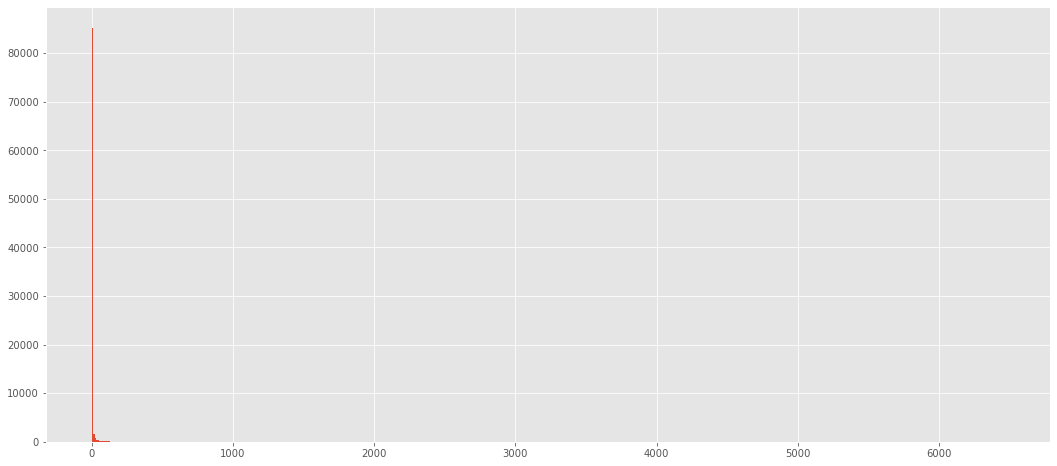

In [6]:
df['NumCases'].hist(bins=600)
plt.show()

<p style='font-family:Trebuchet MS; color:#34495E'>Observation:<br>
    1. Noting though the bins of this histogram is set to 600, the histogram is still extremenly imbalance that most <code>address</code> contributed less than 10 complaints indicating only small portions of the <code>address</code> contributed more than 10 cases. So here, we will create a new column <code>Group</code> to categorise the <code>address</code> to more than 10 cases (1) or less than 10 cases (0). A 1 in <code>Group</code> would indicate the <code>address</code> has a higher tendency to lodge complaints in the future.

In [57]:
df['group'] = [0 if x == 0 else 1 for x in df['NumCases']]

<h1 style='font-family:Trebuchet MS; color:#34495E'> Feature Selection <a id='5'></a></h1>

<p style='font-family:Trebuchet MS'>A simple correlation heat map is used to visualise the correlation between the variables.

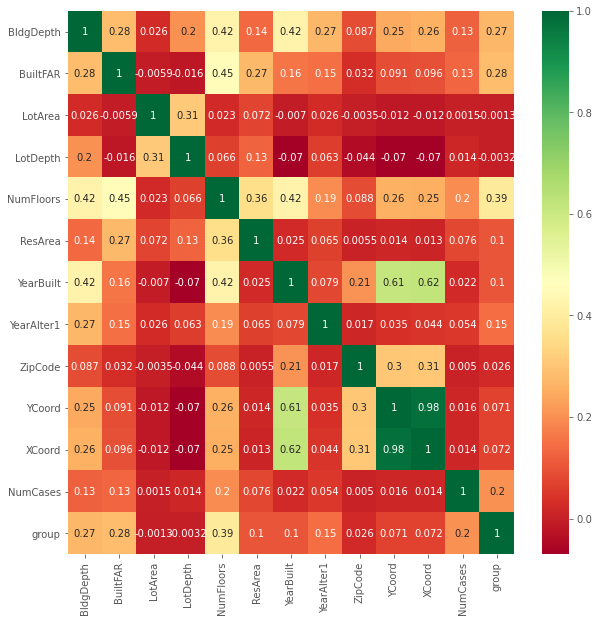

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

<p style='font-family:Trebuchet MS'>Observation:<br>
    1. <code>NumFloors</code> has the highest correlation. <br>
    2. <code>BldgDepth, BuiltFAR</code> have almost the same correlation, are the second highest.<br>
    3. Other than those 3 mentioned, the other variables have correlation less than 0.2.

<p style='font-family:Trebuchet MS'>In fact, all of the variables, even <code>NumFloors</code> & <code>BldgDepth, BuiltFAR</code> have relatively very low correlation value, probably pearson correlation is not a appropraite method to select suitable features for numerical input and categorical output. So I did some research on how to choose a feature selection method, see below:

<img src='https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png'>

<a href='https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/'> source </a>

<p style='font-family:Trebuchet MS'> From the above, we can see that for numerical input and categorical output, ANOVA & Kendall's are much better. Kendall's does assume that the categorical variable is ordinal so we would use ANOVA here. 

In [9]:
X = df.iloc[:,1:11]  #independent columns
y = df['group']    

bestfeatures = SelectKBest(score_func=f_classif, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))

        Specs         Score
4   NumFloors  16419.991064
1    BuiltFAR   7807.349573
0   BldgDepth   7179.432948
7  YearAlter1   1950.137422
6   YearBuilt    992.638194
5     ResArea    981.505095
9      YCoord    459.682536
8     ZipCode     58.831663
3    LotDepth      0.934950
2     LotArea      0.153233


<p style='font-family:Trebuchet MS'> Interestingly, the anova (f_classif) gave similar results: <code>NumFloors(highest)</code>, <code>BuiltFAR, BldgDepth (second)</code>. Here, I chose the Top 3 variables only because the score between Top 3 and the others are extremely different; from 16419 to 0.15, this indicates that the Top 3 features are relatively important. Thus we will be using only the Top 3 variables as predictor variables to build our model.

<h1 style='font-family:Trebuchet MS; color:#34495E'> Logistic Regression<a id='6'></a></h1>

In [11]:
X = df[['NumFloors','LotDepth','BuiltFAR']]
X_ = X.values
y = df['group'].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [16]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)

In [17]:
yhat = LR.predict(x_test)

In [19]:
jaccard_score(y_test, yhat,pos_label=0)

0.8663456456632803

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  942  2009]
 [  267 14753]]


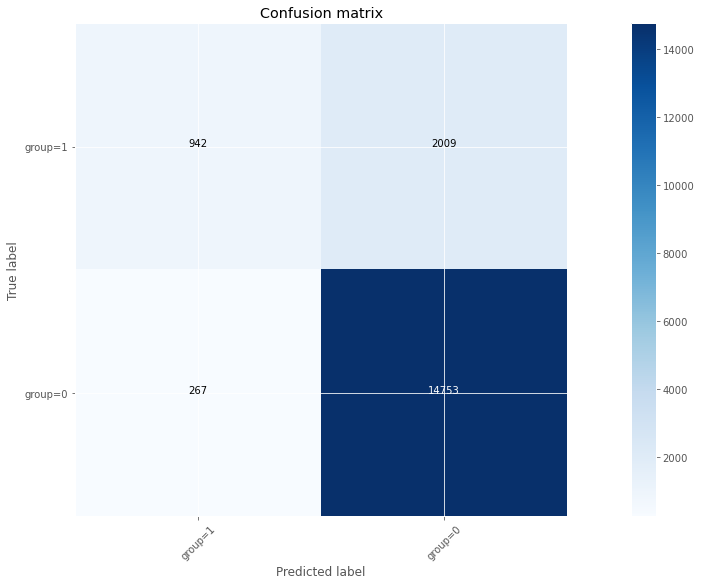

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['group=1','group=0'],normalize= False,  title='Confusion matrix')

<h1 style='font-family:Trebuchet MS; color:#34495E'> K Number Neighbors<a id='7'></a></h1>

In [32]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


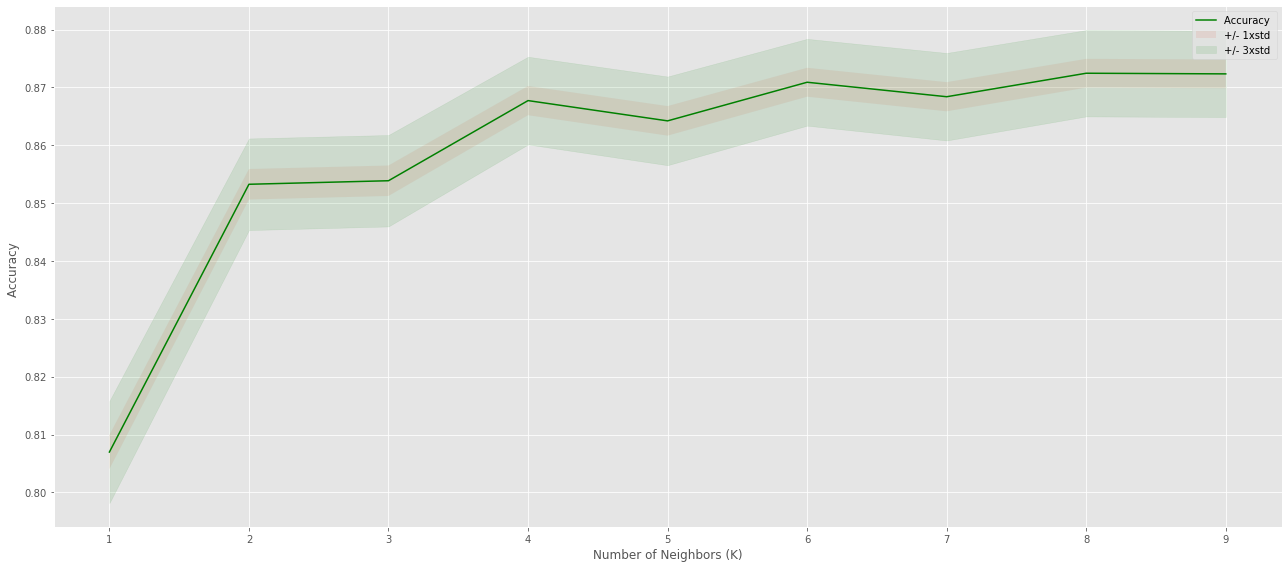

In [33]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [34]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8724611874686996 with k= 8


In [35]:
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat = neigh.predict(x_test)

In [42]:
jaccard_score(y_test, yhat,pos_label=0)

0.8666040945620931

Confusion matrix, without normalization
[[ 1049  1902]
 [  390 14630]]


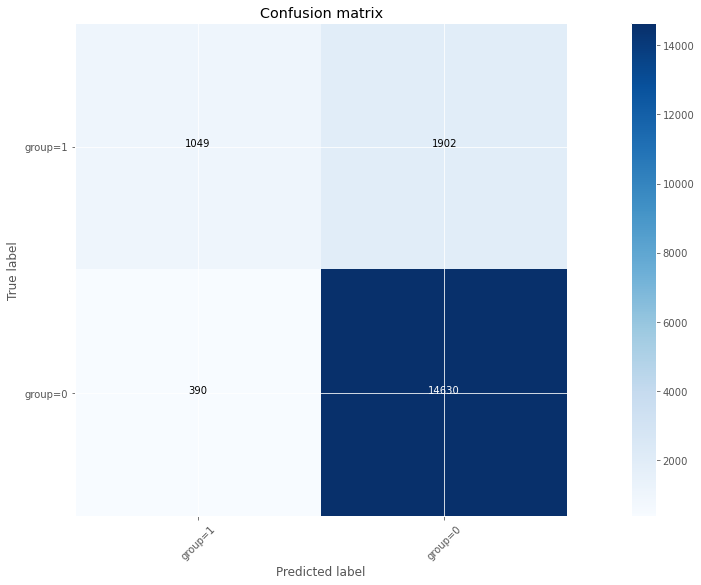

In [36]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['group=1','group=0'],normalize= False,  title='Confusion matrix')

SVM (Support Vector Machines)

In [37]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

SVC()

In [39]:
yhat = clf.predict(x_test)

In [41]:
jaccard_score(y_test, yhat,pos_label=0)

0.8666040945620931

Confusion matrix, without normalization
[[  924  2027]
 [  247 14773]]


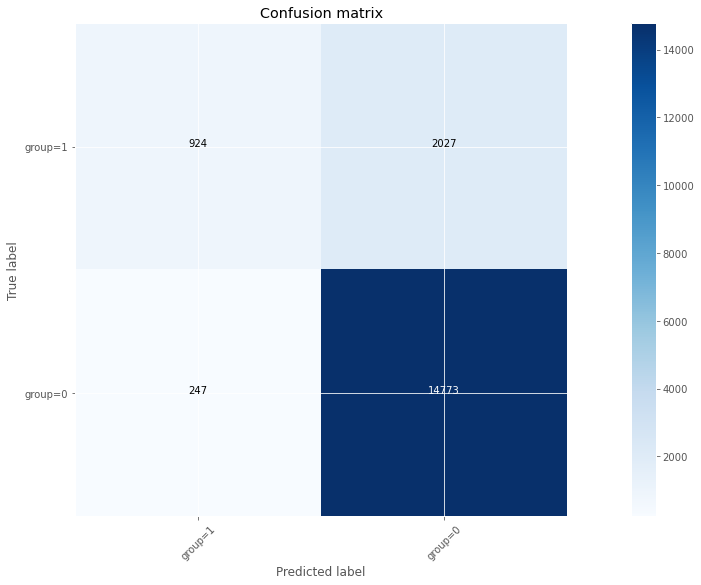

In [40]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['group=1','group=0'],normalize= False,  title='Confusion matrix')

<h1 style='font-family:Trebuchet MS; color:#34495E'> Decision Tree<a id='9'></a></h1>

In [45]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [46]:
yhat = Tree.predict(x_test)

In [48]:
jaccard_score(y_test, yhat,pos_label=0)

0.8696037323569361

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['group=1','group=0'],normalize= False,  title='Confusion matrix')

<p style='font-family:Trebuchet MS'> Since DecisionTree gave a higher score, we would use it to predict the complaint possibility and probability.

In [51]:
yhat_prob = Tree.predict_proba(x_test)
yhat_prob

array([[0.72, 0.28],
       [0.86, 0.14],
       [0.93, 0.07],
       ...,
       [0.95, 0.05],
       [0.95, 0.05],
       [0.93, 0.07]])

In [56]:
pred = Tree.predict([['0.0','88.0','1.8']])
prob = Tree.predict_proba([['0.0','88.0','1.8']])
pred, prob

(array([0], dtype=int64), array([[0.72, 0.28]]))

<h1 style='font-family:Trebuchet MS; color:#34495E'> Conclusion<a id='10'></a></h1>

<p style='font-family:Trebuchet MS'>There is only slight difference between the scores from different models. All of the models produce score at 0.86, which indicates that the model could predict well. However, by comparing all of them, DecisionTree seems to do a better job. Also, we also seemed to be able to predict the possibility and probability of the complaint type with certain building characteristics given.